# **Airport Traffic Visualization geopandas & Plotly✈**
## **정보**
- 1. geopandas 로 데이터 시각화
- 2. plotly express로 시각화 추가
- 3. 뉴욕주 공항의 모양을 지도에 그리는 방법 추가


In [1]:
!pip install geoplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.8 MB/s eta 0:00:00


In [2]:
from datetime import date
import os

# 지리공간 데이터 - 지도 그리기, 공간 분석, 시각화
import geopandas as gpd

# 지도 시각화 및 공간적 패턴 분석
import geoplot as gplt

# 웹에서 사용할 수 있는 상호 작용하는 지도를 만들기 위해 사용되는 라이브러리(지도 위에 마커나 다른 정보를 추가)
import folium

# 지리 공간 데이터를 분류 및 시각화(지도 데이터를 구역별로 나누거나 분류)
import mapclassify


import matplotlib.pyplot as plt

# 그래프의 축을 조정하고 새로운 축을 추가하여 더 복잡한 그래프 레이아웃을 구성(그래프의 축을 분할하거나 색상 막대와 같은 부가적인 그래프 요소를 추가)
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np # linear algebra


import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# 데이터 시각화를 쉽고 간단하게 할 수 있음
import plotly.express as px

# 정규 표현식을 다루기 위한 파이썬 내장 라이브러리(문자열 검색, 추출, 치환 등 다양한 문자열 처리 작업을 수행)
import re

import seaborn as sns

# 지리적인 객체를 생성하고 조작 - 지리적인 점(Point)과 다각형(Polygon)
from shapely.geometry import Point, Polygon

# 여러 다각형들을 하나의 객체로 그룹화하여 처리
from shapely.geometry import MultiPolygon

# 데이터 및 라이브러리 로딩

In [3]:
# 주피터 환경에서 별도의 창 없이 시각화가 잘 되도록 설정
%matplotlib inline

In [4]:
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/data/'
covid_impact_on_airport_traffic =  pd.read_csv(DATA_PATH + 'covid_impact_on_airport_traffic.csv')

In [5]:
covid_impact_on_airport_traffic.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


- AggregationMethod: 이 메트릭을 계산하는 데 사용되는 집계 기간

- Date: 교통량이 측정된 날짜(YYYY-MM-DD 형식).

- Version: 이 데이터 세트의 버전

- AirportName: 공항 이름

- PercentOfBaseline: 기준 기간(예: 2020년 2월 1일 - 2020년 3월 15일)에서 같은 요일의 평균 여행 수와 비교한 이 날짜의 여행 비율

- Centroid: 공항 폴리곤의 중심을 나타내는 지리

- City: 공항이 위치한 도시

- State: 공항이 위치한 주

- ISO_3166_2: 국가 및 세분을 나타내는 ISO-3166-2 코드

- Country: 공항이 위치한 국가

- Geography: 이 메트릭을 계산하는 데 사용되는 공항의 다각형

In [6]:
covid_impact_on_airport_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


결측치는 없음을 확인함.

# 데이터 전처리

더 나은 시각화를 위해 데이터를 사전 처리를 하며,

날짜 열의 데이터를 Date 유형으로 변경하는 과정을 거친다.

In [7]:
covid_impact_on_airport_traffic['Date'] = covid_impact_on_airport_traffic['Date'].map(lambda x : date.fromisoformat(x))
# map이란 Series(데이터프레임의 열과 같은)의 각 요소에 함수를 적용하여 결과를 새 Series로 만드는 데에 사용함

다음으론 평일 열을 만든다.

date.weekday()는 월요일에 0, 일요일에 6 값이 반환된다.

요일 문자열 목록을 사용하면 각 요일 문자열이 있는 요일 열을 얻을 수 있다.

In [8]:
covid_impact_on_airport_traffic['weekday'] = covid_impact_on_airport_traffic['Date'].map(lambda x: x.weekday())
w_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
covid_impact_on_airport_traffic['weekday'] = [w_list[idx] for idx in covid_impact_on_airport_traffic['weekday']]

위도와 경도의 열을 만든다.

Centroid 컬럼이 위도와 경도 데이터를 Point 객체로 가지고 있는 문자열로 파악된다.

그래서 위도와 경도를 잘라낸다.

In [9]:
def cut_long(point):
  # point is like 'POINT(151.180087713813 -33.9459774986125)'
  long, _ =point[6:-1].split(" ")
  return float(long)

def cut_lat(point):
  _, lat = point[6:-1].split(" ")
  return float(lat)

In [10]:
covid_impact_on_airport_traffic['long'] = covid_impact_on_airport_traffic['Centroid'].map(cut_long)
covid_impact_on_airport_traffic['lat'] = covid_impact_on_airport_traffic['Centroid'].map(cut_lat)

우리에게 불필요한 열을 삭제한다.

In [11]:
need_columns = [col for col in covid_impact_on_airport_traffic.columns if not col in ['AggregationMethod', 'Version', 'Centroid']]
covid_impact_on_airport_traffic = covid_impact_on_airport_traffic[need_columns]

In [12]:
covid_impact_on_airport_traffic.head()

,Date,AirportName,PercentOfBaseline,City,State,ISO_3166_2,Country,Geography,weekday,long,lat
0,2020-04-03,Kingsford Smith,64,Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Fri,151.180088,-33.945977
1,2020-04-13,Kingsford Smith,29,Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Mon,151.180088,-33.945977
2,2020-07-10,Kingsford Smith,54,Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Fri,151.180088,-33.945977
3,2020-09-02,Kingsford Smith,18,Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Wed,151.180088,-33.945977
4,2020-10-31,Kingsford Smith,22,Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Sat,151.180088,-33.945977


'AggregationMethod', 'Version', 'Centroid' 열은 삭제되었고,

'weekday',	'long',	'lat' 열은 추가된 상태임을 확인할 수 있다.

그리고 다른 데이터 프레임을 생성하는데 이 것으로 공항 이름을 고유하게 설정해 각 공항의 데이터를 쉽게 보도록 설정한다.

In [13]:
covid_impact_on_airport_traffic_unique = covid_impact_on_airport_traffic[~covid_impact_on_airport_traffic[['AirportName']].duplicated()].reset_index(drop = True)
covid_impact_on_airport_traffic_unique

,Date,AirportName,PercentOfBaseline,City,State,ISO_3166_2,Country,Geography,weekday,long,lat
0,2020-04-03,Kingsford Smith,64,Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Fri,151.180088,-33.945977
1,2020-03-17,Santiago International Airport,72,Santiago,Santiago Province,CL,Chile,"POLYGON((-70.8043956756592 -33.3719683869737, ...",Tue,-70.794237,-33.390727
2,2020-04-05,Calgary International,65,Calgary,Alberta,CA-AB,Canada,"POLYGON((-113.981866836548 51.1392131913567, -...",Sun,-114.013123,51.118475
3,2020-04-20,Edmonton International,46,Leduc County,Alberta,CA-AB,Canada,"POLYGON((-113.568120002747 53.3110445425655, -...",Mon,-113.576261,53.308783
4,2020-05-15,Vancouver International,68,Richmond,British Columbia,CA-BC,Canada,"POLYGON((-123.136525154114 49.1980971490671, -...",Fri,-123.177541,49.193579
5,2020-05-27,Winnipeg International,100,Winnipeg,Manitoba,CA-MB,Canada,"POLYGON((-97.2094345092773 49.8979517850609, -...",Wed,-97.219062,49.902471
6,2020-03-29,Halifax International,32,Halifax,Nova Scotia,CA-NS,Canada,"POLYGON((-63.5266613960266 44.8984438169036, -...",Sun,-63.511672,44.883017
7,2020-04-10,Toronto Pearson,10,Mississauga,Ontario,CA-ON,Canada,"POLYGON((-79.6076846122742 43.6972621366144, -...",Fri,-79.631344,43.679352
8,2020-08-10,Hamilton International,100,Hamilton,Ontario,CA-ON,Canada,"POLYGON((-79.932746887207 43.1551600161937, -7...",Mon,-79.926693,43.172036
9,2020-09-16,Montreal Mirabel,100,Mirabel,Quebec,CA-QC,Canada,"POLYGON((-74.0895652770996 45.6856314730097, -...",Wed,-74.048380,45.681503


아래에서 설정하는 데이터 프레임은 키가 공항 이름인 기하학적 데이터프레임이다.

필요한 컬럼들만 뽑아 사용한다.

In [14]:
df_geometry = covid_impact_on_airport_traffic_unique[['AirportName','City', 'State', 'ISO_3166_2', 'Country', 'long', 'lat']]


# 데이터 개요

공항의 위치를 알아보기위해 folium을 사용하는데 interactive한 지도에서 위치를 확인가능하다.

여기서 의미하는 것은 우리가 확대, 축소, 드래그 등이 가능한 지도에서 위치 파악을 할 수 있도록 folium을 사용하도록 한다.

In [15]:
def visualize_airport_map(df,  zoom):

    lat_map = 30.038557
    lon_map = 31.231781
    f = folium.Figure(width = 1000, height = 500)
    m = folium.Map([lat_map,lon_map], zoom_start = zoom).add_to(f)

    for i in range(0,len(df)):
        folium.Marker(location = [df["lat"][i],df["long"][i]],icon = folium.Icon(icon_color='white',icon ='plane',prefix='fa')).add_to(m)

    return m

In [16]:
visualize_airport_map(covid_impact_on_airport_traffic_unique, 1)

공항은 대부분 북미에 위치한다.

또한, 공항이 위치한 지역의 이름과 지리정보를 쉽게 조회할 수 있다.

파이차트를 통해 국가별 기록이 몇개인지 확인해보자

Text(0.5, 1.0, 'records for each country')

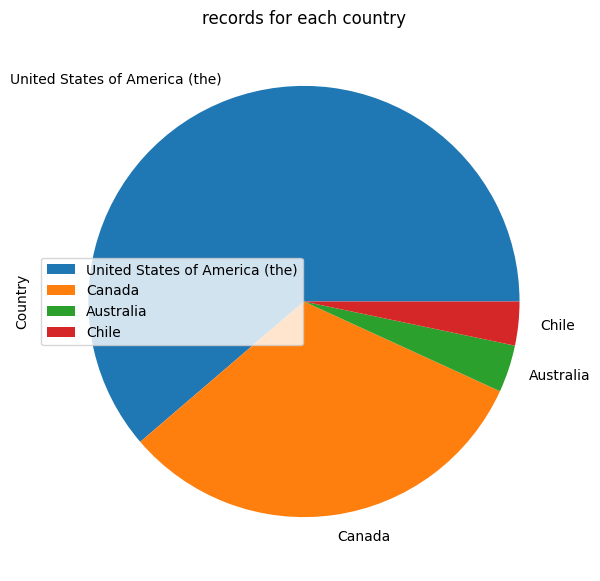

In [17]:
# 국가 열에 있는 고유값들의 갯수 카운트
df_Country_count = pd.DataFrame(covid_impact_on_airport_traffic['Country'].value_counts())

g = df_Country_count.plot.pie(y = 'Country', figsize = (7, 7))
g.set_title('records for each country')

pie 그래프를 통해 대부분이 북미에 위치함을 확인했고, 특히 미국이 전체의 절반 이상을 차지한다.

이번엔 공항 당 레코드 수를 계산해보자

각 공항의 레코드 수는 대략 동일하다.

Text(0.5, 1.0, 'records for each airport')

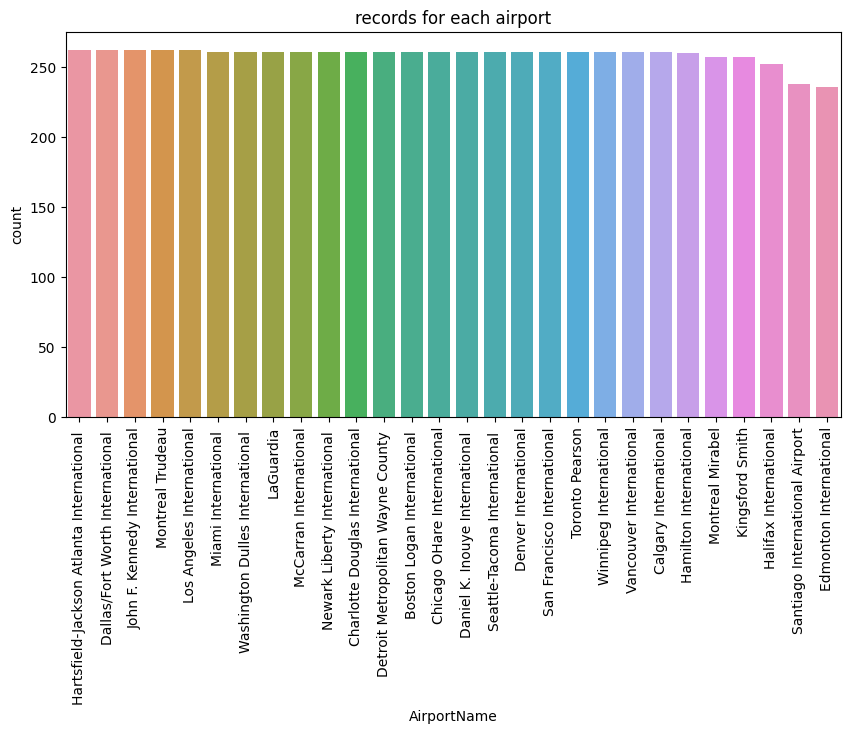

In [18]:
plt.figure(figsize = (10, 5))
g = sns.countplot(data = covid_impact_on_airport_traffic, x = 'AirportName',
                  order = covid_impact_on_airport_traffic['AirportName'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
g.set_title('records for each airport')

월별 레코드 수를 계산해보자

4~9월 까지의 레코드 수는 같지만, 3월과 10월은 적다.

Text(0.5, 1.0, 'records for each month')

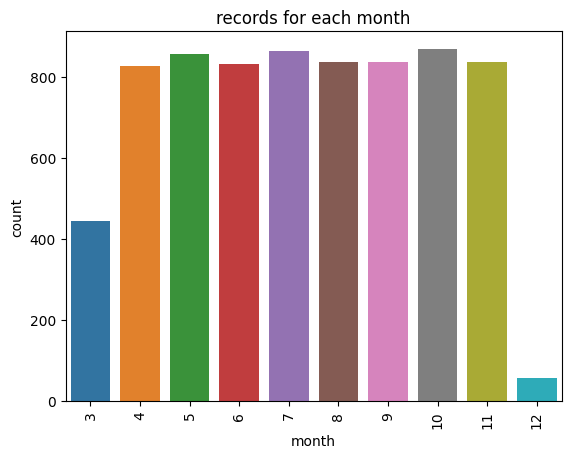

In [19]:
df_month_count = pd. DataFrame(covid_impact_on_airport_traffic['Date'].map(lambda d: d.month).value_counts())
df_month_count = df_month_count.reset_index()
df_month_count = df_month_count.rename(columns = {'Date':'count', 'index':'month'})
g = sns.barplot(data = df_month_count.reset_index(), y = 'count', x = 'month')
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
g.set_title('records for each month')

마지막으로 평일 요금을 확인해보자

파이차트를 보면 거의 비슷하다는 것을 알 수 있다.



Text(0.5, 1.0, 'records for each weekday')

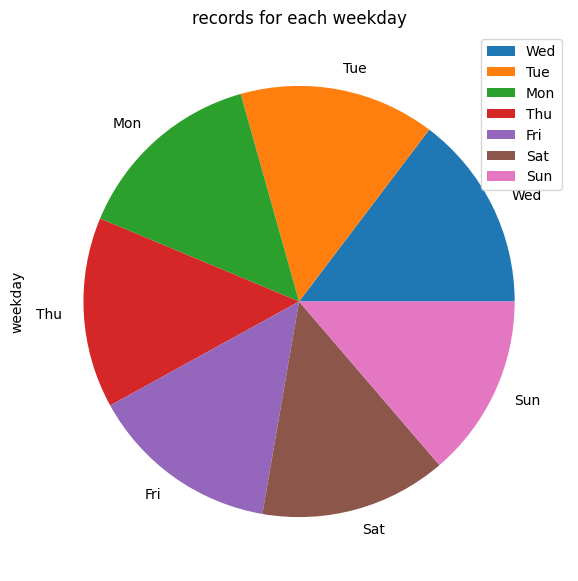

In [20]:
df_weekday_count = pd.DataFrame(covid_impact_on_airport_traffic['weekday'].value_counts())
g = df_weekday_count.plot.pie(y = 'weekday', figsize = (7, 7))
g.set_title('records for each weekday')

# geopandas 로 시각화 하는 방법

geopandas로 세계지도에 데이터를 plot 한다.

geopandas를 먼저 생성하는데, 생성시 'geometry'인수를 지정해 point 인스턴스의 열을 생성할 수 있다.

In [21]:
gdf = gpd.GeoDataFrame(covid_impact_on_airport_traffic_unique, geometry = gpd.points_from_xy(covid_impact_on_airport_traffic_unique.long, covid_impact_on_airport_traffic_unique.lat))

In [22]:
gdf.head()

,Date,AirportName,PercentOfBaseline,City,State,ISO_3166_2,Country,Geography,weekday,long,lat,geometry
0,2020-04-03,Kingsford Smith,64,Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Fri,151.180088,-33.945977,POINT (151.18009 -33.94598)
1,2020-03-17,Santiago International Airport,72,Santiago,Santiago Province,CL,Chile,"POLYGON((-70.8043956756592 -33.3719683869737, ...",Tue,-70.794237,-33.390727,POINT (-70.79424 -33.39073)
2,2020-04-05,Calgary International,65,Calgary,Alberta,CA-AB,Canada,"POLYGON((-113.981866836548 51.1392131913567, -...",Sun,-114.013123,51.118475,POINT (-114.01312 51.11848)
3,2020-04-20,Edmonton International,46,Leduc County,Alberta,CA-AB,Canada,"POLYGON((-113.568120002747 53.3110445425655, -...",Mon,-113.576261,53.308783,POINT (-113.57626 53.30878)
4,2020-05-15,Vancouver International,68,Richmond,British Columbia,CA-BC,Canada,"POLYGON((-123.136525154114 49.1980971490671, -...",Fri,-123.177541,49.193579,POINT (-123.17754 49.19358)


datasets.get_path()로 세계지도를 얻는다.

이를 통해 세계지도 데이터가 포함된 GeoDataFrame 를 얻을 수 있다.

In [23]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

<ipython-input-23-36b5037703e3>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


plot을 이용해 지도를 그린다.

Text(0.5, 1.0, 'example world map')

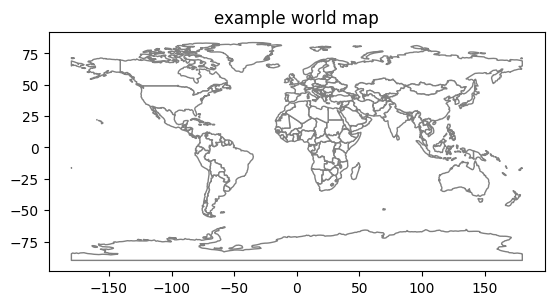

In [24]:
g = world.plot(color = 'white', edgecolor = 'gray')
g.set_title('example world map')

여기에 월드맵 데이터를 덮어씌운다.

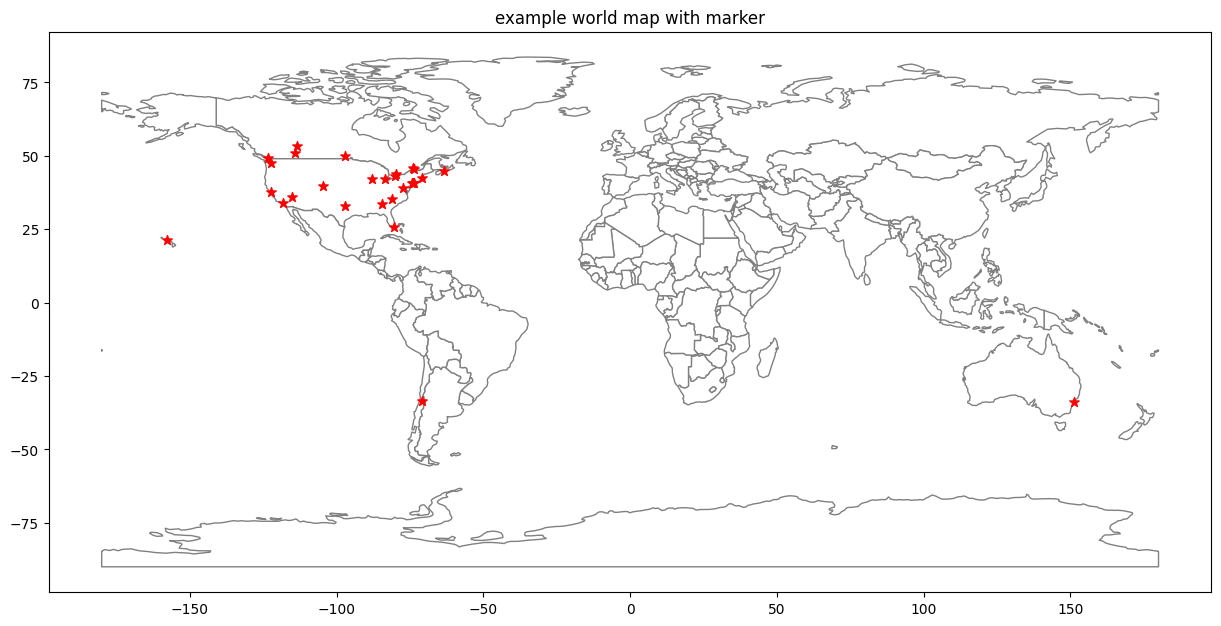

In [25]:
ax = world.plot(color = 'white', edgecolor = 'gray', figsize = (15, 10))
g = gdf.plot(ax = ax, marker = '*', color = 'red', markersize = 50)
g.set_title('example world map with marker')
plt.show()

세계 지도에 공항의 위치를 표시할 수 있다.

plot을 사용할 때 column argument를 넘겨주면 쉽게 choropleth를 map처럼 생성가능하다.

공항사용 빈도에 따라 창의적으로 범례를 추가해보자

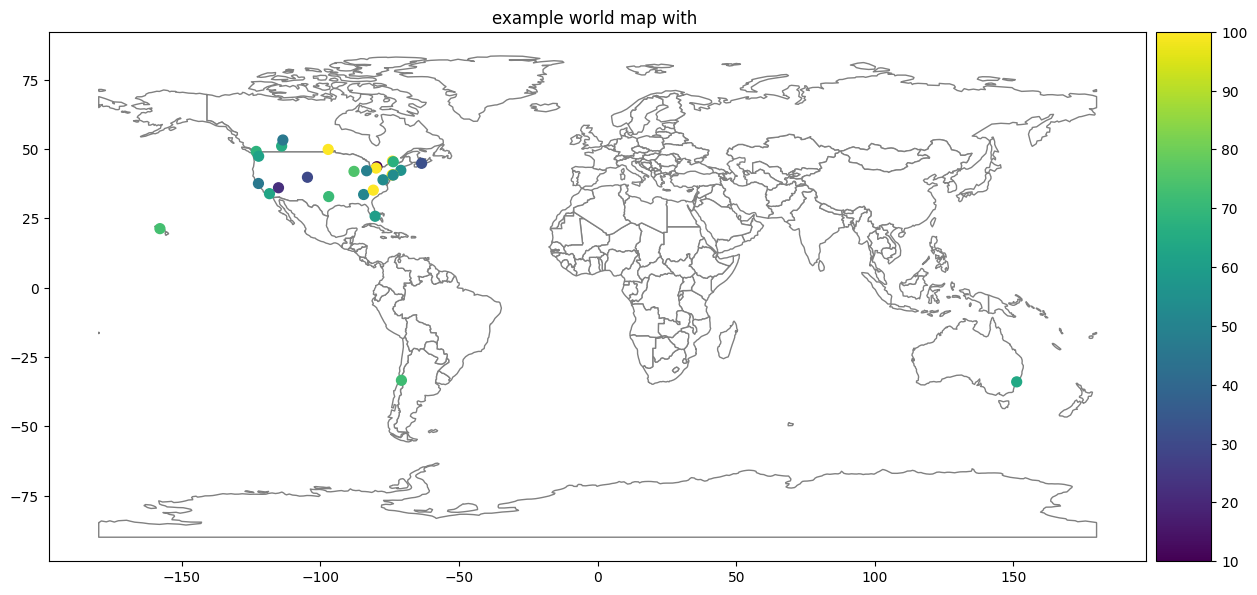

In [26]:
fig, ax = plt.subplots(1, 1, figsize = (15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size = '5%', pad = 0.1)

world.plot(ax = ax, color = 'white', edgecolor = 'gray')
g = gdf.plot(column = 'PercentOfBaseline', ax = ax, markersize = 50, legend = True, cax = cax)
g.set_title('example world map with ')
plt.show()

covid_impact_on_airport_traffic_unique 는 공항정보가 고유하도록 적절하게 만든 데이터 프레임이다.

그래서 지도의 시각화는 큰 의미없고, 아래에 의미있는 데이터로 시각화를 해보자

# geopandas를 사용한 시각화
## 평일 평균
먼저 지정된 평일에 걸쳐 PercentOfBaseline 의 평균을 구한다.

공항과 요일을 복합 키로 사용되며, 평균화 되고 지리 데이터와 결합되어 시각화할 데이터를 생성한다.

In [27]:
df_airport_weekday_mean = covid_impact_on_airport_traffic[['AirportName', 'weekday', 'PercentOfBaseline']].groupby(['AirportName', 'weekday']).mean()
df_airport_weekday_mean = df_airport_weekday_mean.reset_index()
df_airport_weekday_mean = df_airport_weekday_mean.merge(df_geometry, on = 'AirportName')

In [28]:
df_airport_weekday_mean.head()

,AirportName,weekday,PercentOfBaseline,City,State,ISO_3166_2,Country,long,lat
0,Boston Logan International,Fri,63.567568,Boston,Massachusetts,US-MA,United States of America (the),-71.010291,42.363633
1,Boston Logan International,Mon,64.162162,Boston,Massachusetts,US-MA,United States of America (the),-71.010291,42.363633
2,Boston Logan International,Sat,62.432432,Boston,Massachusetts,US-MA,United States of America (the),-71.010291,42.363633
3,Boston Logan International,Sun,63.351351,Boston,Massachusetts,US-MA,United States of America (the),-71.010291,42.363633
4,Boston Logan International,Thu,61.432432,Boston,Massachusetts,US-MA,United States of America (the),-71.010291,42.363633


일요일 데이터만 추출해 GeoDataFrame를 생성하자

In [29]:
df_airport_weekday_mean_sun = df_airport_weekday_mean[df_airport_weekday_mean['weekday']=='Sun']
gdf_airport_weekday_mean_sun = gpd.GeoDataFrame(df_airport_weekday_mean_sun, geometry=gpd.points_from_xy(df_airport_weekday_mean_sun.long, df_airport_weekday_mean_sun.lat))

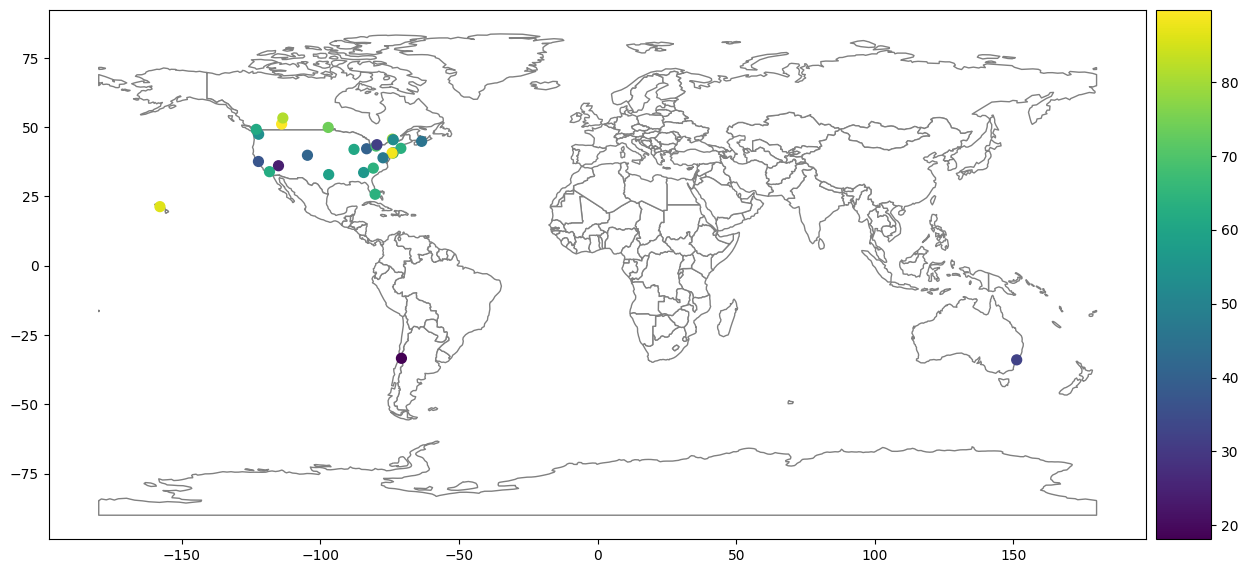

In [30]:
fig, ax = plt.subplots(1, 1, figsize = (15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size = '5%', pad = 0.1)

world.plot(ax = ax, color = 'white', edgecolor = 'gray')
gdf_airport_weekday_mean_sun.plot(column = 'PercentOfBaseline', ax = ax, markersize = 50, legend = True, cax = cax)
plt.show()

수요일 데이터만 추출하고 GeoDataFrame를 만들어 plot 한다.

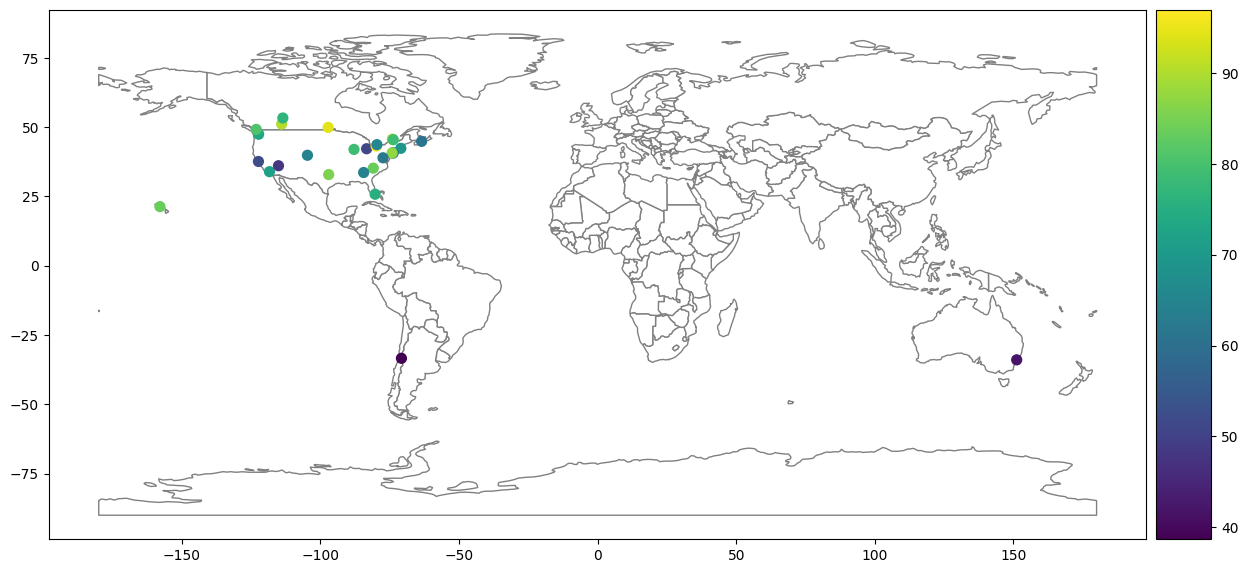

In [31]:
df_airport_weekday_mean_wed = df_airport_weekday_mean[df_airport_weekday_mean['weekday'] == 'Wed']
gdf_airport_weekday_mean_wed = gpd.GeoDataFrame(df_airport_weekday_mean_wed, geometry = gpd.points_from_xy(df_airport_weekday_mean_wed.long, df_airport_weekday_mean_wed.lat))

fig, ax = plt.subplots(1, 1, figsize = (15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size = '5%', pad = 0.1)

world.plot(ax = ax, color = 'white', edgecolor = 'gray')
gdf_airport_weekday_mean_wed.plot(column = 'PercentOfBaseline', ax = ax, markersize  = 50, legend = True, cax = cax)
plt.show()

일요일은 하와이의 PercentOfBaseline이 가장 높지만 수요일에는 위니펙의 값이 가장 높다.

모든 평일의 평균을 보는 것이 이치에 맞는 것인지 모르겠으므로 그대로 두겠다.

## 월 평균
그리고 특정 달에 plot을 꾸미려고 노력한다.

평일과 마찬가지로 이제 공항 이름과 월을 복합 키로 사용하여 테이블을 만든다.

In [48]:
df_airport_date_mean = covid_impact_on_airport_traffic[['AirportName', 'Date', 'PercentOfBaseline']]
df_airport_date_mean['Date'] = df_airport_date_mean['Date'].map(lambda d : d.month)
df_airport_date_mean = df_airport_date_mean.groupby(['AirportName', 'Date']).mean()
df_airport_date_mean = df_airport_date_mean.reset_index()
df_airport_date_mean = df_airport_date_mean.merge(df_geometry, on = 'AirportName')
df_airport_date_mean = df_airport_date_mean.rename(columns = {'Date' : 'month'})

<ipython-input-48-7c25db50c486>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airport_date_mean['Date'] = df_airport_date_mean['Date'].map(lambda d : d.month)


월별로 필터링를 하고, geopandas 시각화 한다.

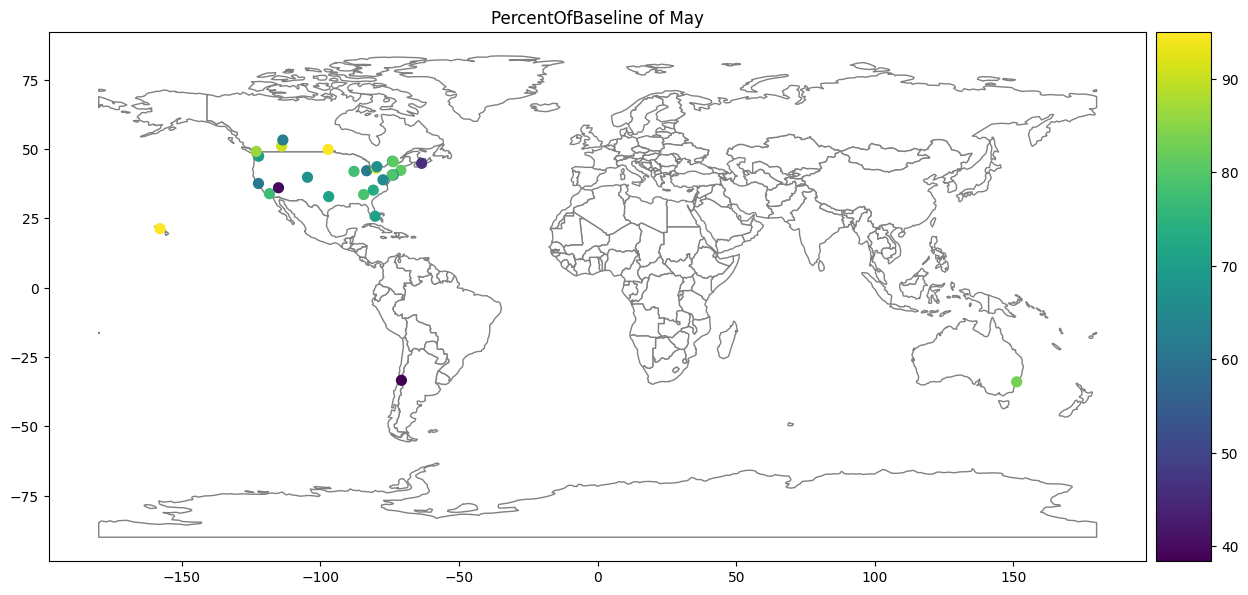

In [49]:
df_airport_date_mean_3 = df_airport_date_mean[df_airport_date_mean["month"]==3]
df_airport_date_mean_3 = gpd.GeoDataFrame(df_airport_date_mean_3,
                                                geometry=gpd.points_from_xy(df_airport_date_mean_3.long, df_airport_date_mean_3.lat))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(ax=ax, color='white', edgecolor='gray')
g = df_airport_date_mean_3.plot(column='PercentOfBaseline', ax=ax, markersize=50, legend=True, cax=cax)
g.set_title("PercentOfBaseline of May")
plt.show()

하와이의 Daniel K. Inouye 국제공항이 가장 높고, Santiago 국제공항이 가장 낮다.


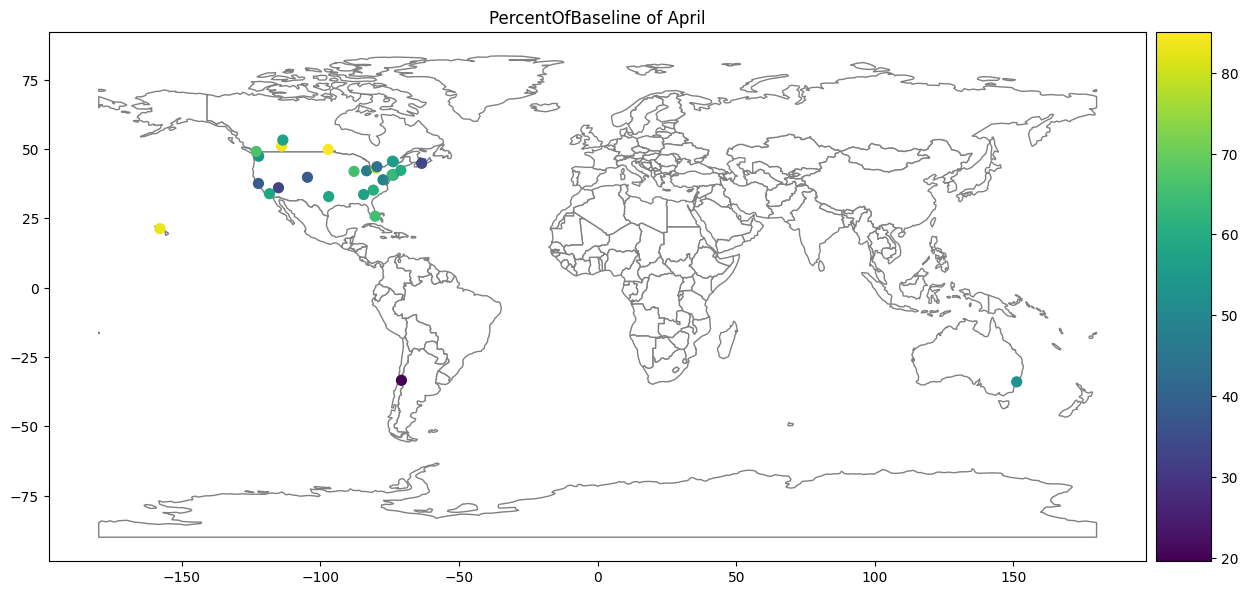

In [50]:
df_airport_date_mean_4 = df_airport_date_mean[df_airport_date_mean["month"]==4]
df_airport_date_mean_4 = gpd.GeoDataFrame(df_airport_date_mean_4,
                                                geometry=gpd.points_from_xy(df_airport_date_mean_4.long, df_airport_date_mean_4.lat))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(ax=ax, color='white', edgecolor='gray')
g = df_airport_date_mean_4.plot(column='PercentOfBaseline', ax=ax, markersize=50, legend=True, cax=cax)
g.set_title("PercentOfBaseline of April")
plt.show()

Winnipeg 국제공항이 가장 높고, Santiago 국제공항이 가장 낮다.



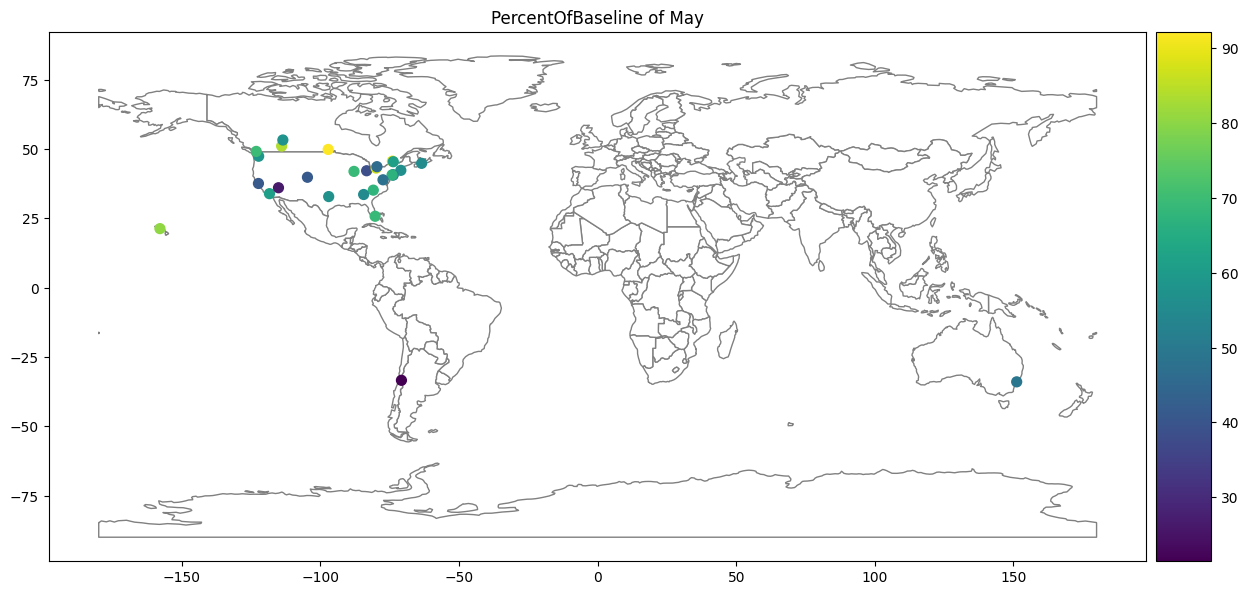

In [51]:
df_airport_date_mean_5 = df_airport_date_mean[df_airport_date_mean["month"]==5]
df_airport_date_mean_5 = gpd.GeoDataFrame(df_airport_date_mean_5,
                                                geometry=gpd.points_from_xy(df_airport_date_mean_5.long, df_airport_date_mean_5.lat))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(ax=ax, color='white', edgecolor='gray')
g = df_airport_date_mean_5.plot(column='PercentOfBaseline', ax=ax, markersize=50, legend=True, cax=cax)
g.set_title("PercentOfBaseline of May")
plt.show()

Winnipeg 국제공항이 가장 높고, Santiago 국제공항이 가장 낮다.



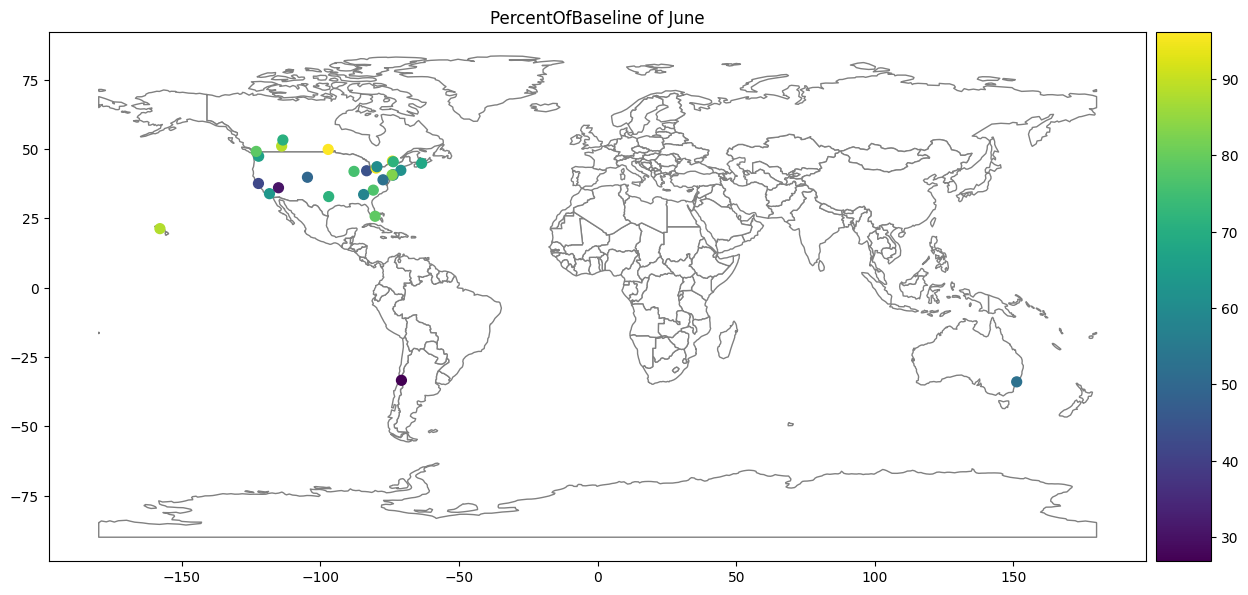

In [52]:
df_airport_date_mean_6 = df_airport_date_mean[df_airport_date_mean["month"]==6]
df_airport_date_mean_6 = gpd.GeoDataFrame(df_airport_date_mean_6,
                                                geometry=gpd.points_from_xy(df_airport_date_mean_6.long, df_airport_date_mean_6.lat))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(ax=ax, color='white', edgecolor='gray')
g = df_airport_date_mean_6.plot(column='PercentOfBaseline', ax=ax, markersize=50, legend=True, cax=cax)
g.set_title("PercentOfBaseline of June")
plt.show()

Winnipeg 국제공항이 가장 높고, Santiago 국제공항이 가장 낮다.



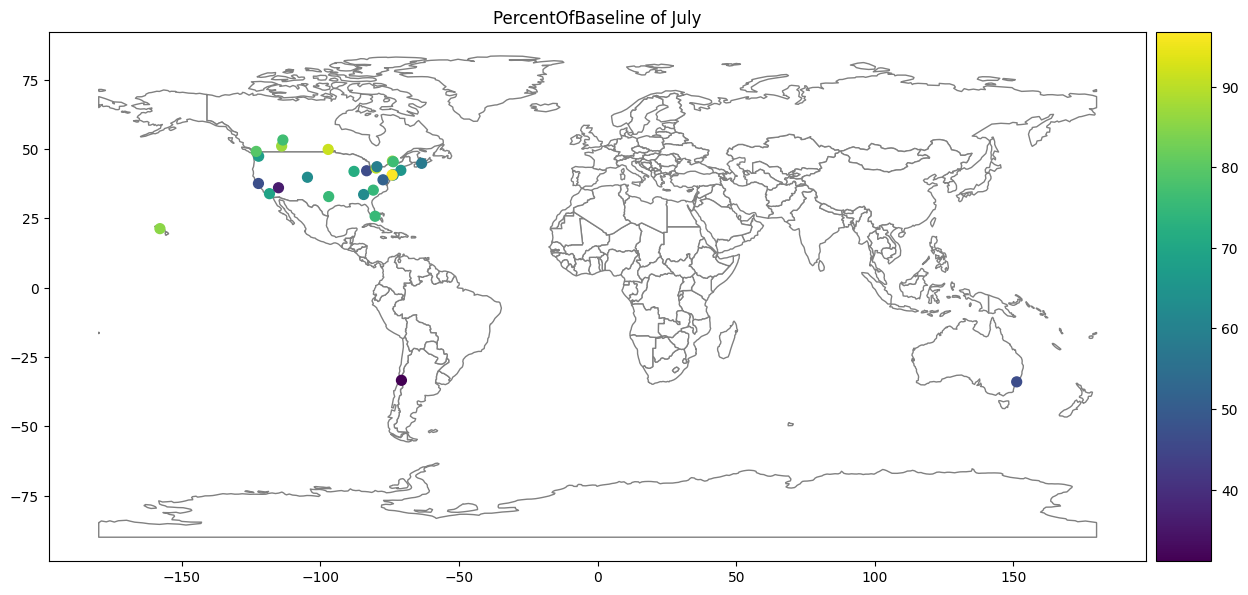

In [53]:
df_airport_date_mean_7 = df_airport_date_mean[df_airport_date_mean["month"]==7]
df_airport_date_mean_7 = gpd.GeoDataFrame(df_airport_date_mean_7,
                                                geometry=gpd.points_from_xy(df_airport_date_mean_7.long, df_airport_date_mean_7.lat))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(ax=ax, color='white', edgecolor='gray')
g = df_airport_date_mean_7.plot(column='PercentOfBaseline', ax=ax, markersize=50, legend=True, cax=cax)
g.set_title("PercentOfBaseline of July")
plt.show()

뉴어크 리버티 국제공항이 가장 높고, 산티아고 국제공항이 가장 낮습니다.

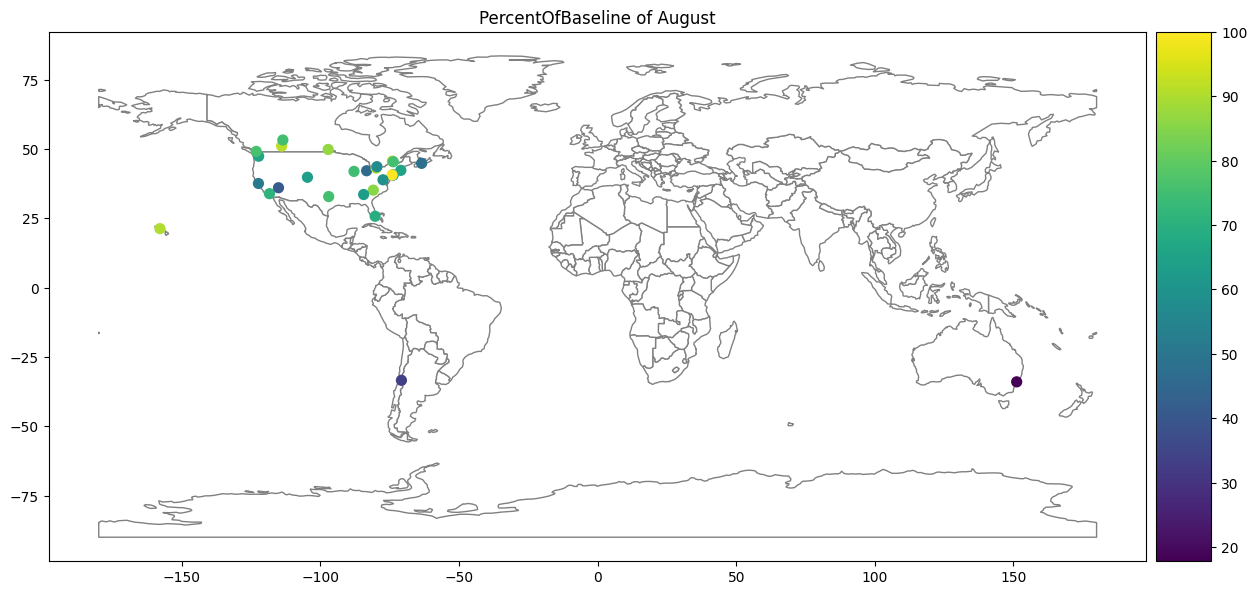

In [54]:
df_airport_date_mean_8 = df_airport_date_mean[df_airport_date_mean["month"]==8]
df_airport_date_mean_8 = gpd.GeoDataFrame(df_airport_date_mean_8,
                                                geometry=gpd.points_from_xy(df_airport_date_mean_8.long, df_airport_date_mean_8.lat))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(ax=ax, color='white', edgecolor='gray')
g = df_airport_date_mean_8.plot(column='PercentOfBaseline', ax=ax, markersize=50, legend=True, cax=cax)
g.set_title("PercentOfBaseline of August")
plt.show()

뉴어크 리버티 국제공항이 가장 높고, 킹스포드 스미스 공항이 가장 낮습니다.

# plot으로 시각화
Plotly express의 smash_mapbox 기능을 사용하면 대화형 지리 도표를 쉽게 만들 수 있다.

지금까지는 월별, 요일별 상세 데이터를 살펴 봤지만, 여기서는 나중에 논의할 이유로 전체 데이터를 공항명별로 시각화한다.

In [55]:
df_airport_date_all_mean = covid_impact_on_airport_traffic.groupby(['AirportName']).mean()
df_airport_date_all_mean = df_airport_date_all_mean.reset_index()

<ipython-input-55-c0df5974b8f9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_airport_date_all_mean = covid_impact_on_airport_traffic.groupby(['AirportName']).mean()


In [56]:
df_airport_date_all_mean.head()

,AirportName,PercentOfBaseline,long,lat
0,Boston Logan International,64.704981,-71.010291,42.363633
1,Calgary International,89.513410,-114.013123,51.118475
2,Charlotte Douglas International,75.375479,-80.947811,35.213689
3,Chicago OHare International,73.084291,-87.910595,41.980460
4,Dallas/Fort Worth International,75.293893,-97.039498,32.894059


In [57]:
fig = px.scatter_mapbox(df_airport_date_all_mean,
                        lat = 'lat',
                        lon = 'long',
                        hover_name = 'AirportName',
                        hover_data = ['PercentOfBaseline'],
                        color = 'PercentOfBaseline',
                        zoom = 1,
                        height = 600,
                        size = 'PercentOfBaseline',
                        size_max = 30,
                        opacity = 0.4,
                        width = 1300)
fig.update_layout(mapbox_style = 'stamen-terrain')
fig.update_layout(margin = {'r' : 0, 't' : 0, 'l' : 0, 'b' : 0})
fig.update_layout(title_text = 'Mean of trafic on sunday')
fig.show()

위도와 경도를 지정하면 마커의 위치를 지정할 수 있고, 색상과 크기를 지정하면 데이터 크기에 맞게 마커의 색상과 크기를 변경할 수 있다.

그리고 mapbox_style을 stimen-terrain으로 설정하면 지리적 특징을 색상으로 나타내는 지도에 데이터를 표시하는 것이 가능하다.

Hamilton 국제공항이 가장 높고, Santiago 국제공항이 가장 낮은 것을 알 수 있다.

geopandas plot과는 다르게 interactive plot이라 커서를 점 위로 가져가서 특정 값을 얻을 수 있다.

mapbox_style에 carto-positron을 사용하면 더 간단하게 지도를 시각화 할 수 있다.

In [59]:
fig = px.scatter_mapbox(df_airport_date_all_mean,
                        lat="lat",
                        lon="long",
                        hover_name="AirportName",
                        hover_data=["PercentOfBaseline"],
                        color="PercentOfBaseline",
                        zoom=1,
                        height=600,
                        size="PercentOfBaseline",
                        size_max=30,
                        opacity=0.4,
                        width=1300)
fig.update_layout(mapbox_style='carto-positron')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(title_text="Mean of trafic on sunday")
fig.show()

plotly를 쓰는 것이 무조건 좋은 것만은 아니다.

그 예로 많은 plot을 만들면, 일부는 표시가 되지 않는다.

우리는 지금 지리적 데이터를 시각화하려하기 때문에, 많은 plot이 표시되야 한다.

그리고 많은 양의 데이터를 plot하면 저장하고 브라우저에서 볼 때 오래걸린다.

그러나 scatter_mapbox는 지리적 시각화에 강하고 아주 유용한 기능으로 많은 사람들이 사용하며, 적극적으로 활용해야 한다.

# 부록
지리 데이터의 시각화를 위한 참고 자료로 geoplot울 사용한 시각화 방법을 포함한다.

## 지도에 공항 모양을 그리는 방법
Geography 열에 Poligon data를 plot했다.

geoplot에 plot하기 위해 컬럼을 변경하고 데이터를 문자열에서 다각형 인스턴스로 변환한다.

In [61]:
gdf = gdf[[col for col in gdf.columns if col not in ['geometry']]]
gdf = gdf.rename(columns = {'Geography' : 'geometry'})

In [66]:
def polygon_str2polygon(polygon_str):
  coodinates = re.split('[, ]', polygon_str[9:-2])
  coodinates = [float(item) for item in coodinates if item != '']
  return Polygon([coodinates[i:i+2] for i in range(0, len(coodinates),2)])

gdf['geometry'] = gdf['geometry'].map(polygon_str2polygon)

뉴욕의 데이터를 살펴보면,

In [67]:
gdf_newyork = gdf[gdf['City'].isin(['New York'])]
gdf_newyork = gpd.GeoDataFrame(gdf_newyork)
gdf_newyork

,Date,AirportName,PercentOfBaseline,City,State,ISO_3166_2,Country,geometry,weekday,long,lat
23,2020-03-16,LaGuardia,95,New York,New York,US-NY,United States of America (the),"POLYGON ((-73.88763 40.76728, -73.88683 40.767...",Mon,-73.873246,40.773883
24,2020-05-26,John F. Kennedy International,53,New York,New York,US-NY,United States of America (the),"POLYGON ((-73.78840 40.62270, -73.78494 40.621...",Tue,-73.778447,40.646027


우리는 다각형 인스턴스를 볼 수 있다.

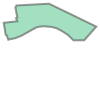

In [68]:
gdf_newyork.iloc[0]['geometry']

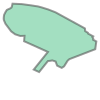

In [69]:
gdf_newyork.iloc[1]['geometry']

두 도형을 묘사히가 위한 배경 역할에 쓰일 뉴욕의 지도를 만들 것이다.

In [70]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
newyork_shape = contiguous_usa[contiguous_usa['state'].isin(['New York'])]
newyork_shape

,state,adm1_code,population,geometry
45,New York,USA-3559,19378102,"POLYGON ((-74.67903 41.35549, -74.84044 41.426..."


Text(0.5, 1.0, 'New York')

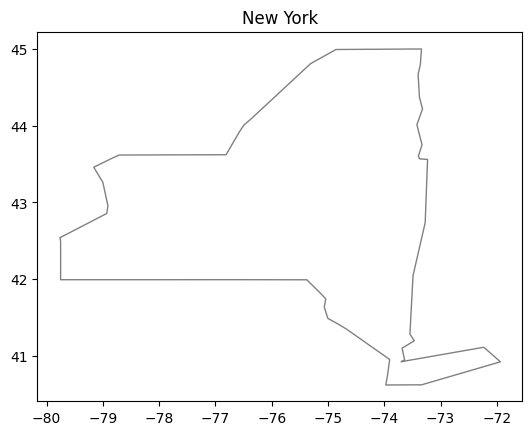

In [71]:
g = newyork_shape.plot(color = 'white', edgecolor = 'gray')
g.set_title('New York')

뉴욕 배경에 공항을 그릴 것이다.

/usr/local/lib/python3.10/dist-packages/geoplot/geoplot.py:615: UserWarning:

Cannot set "figsize" when passing an "ax" to the plot. To remove this warning omit the "figsize" parameter.



<Axes: >

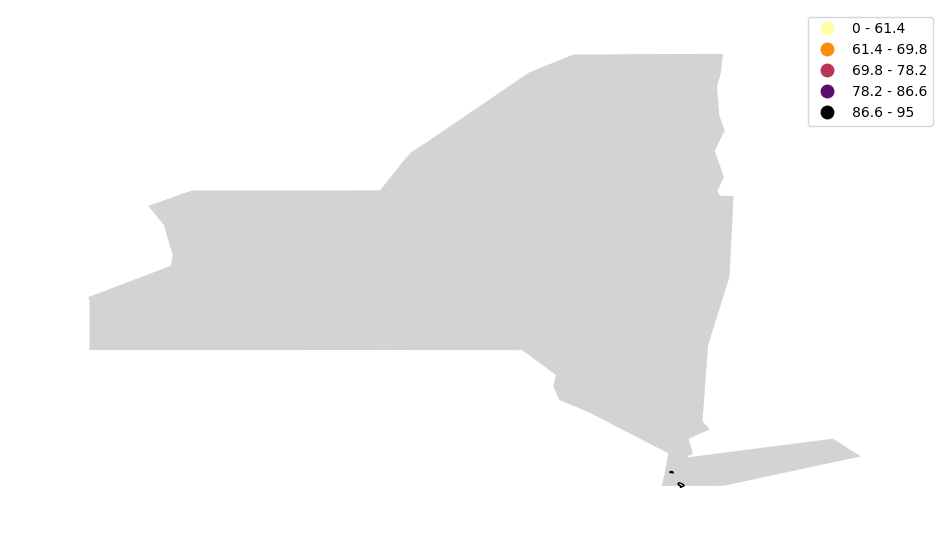

In [75]:
gpd_per_person = gdf_newyork['PercentOfBaseline']
scheme = mapclassify.Quantiles(gpd_per_person, k = 5)

base1 = gplt.choropleth(
    gdf_newyork,
    hue = gpd_per_person,
    scheme = scheme,
    cmap = 'inferno_r',
    legend = True,
    figsize = (12, 12)
)

gplt.polyplot(
    newyork_shape, ax = base1,
    edgecolor = 'white',
    facecolor = 'lightgray',
    figsize = (12, 12)
)

ax에 전달된 plot을 교체해 지도를 바꿀 수 있다.

/usr/local/lib/python3.10/dist-packages/geoplot/geoplot.py:615: UserWarning:

Cannot set "figsize" when passing an "ax" to the plot. To remove this warning omit the "figsize" parameter.



<Axes: >

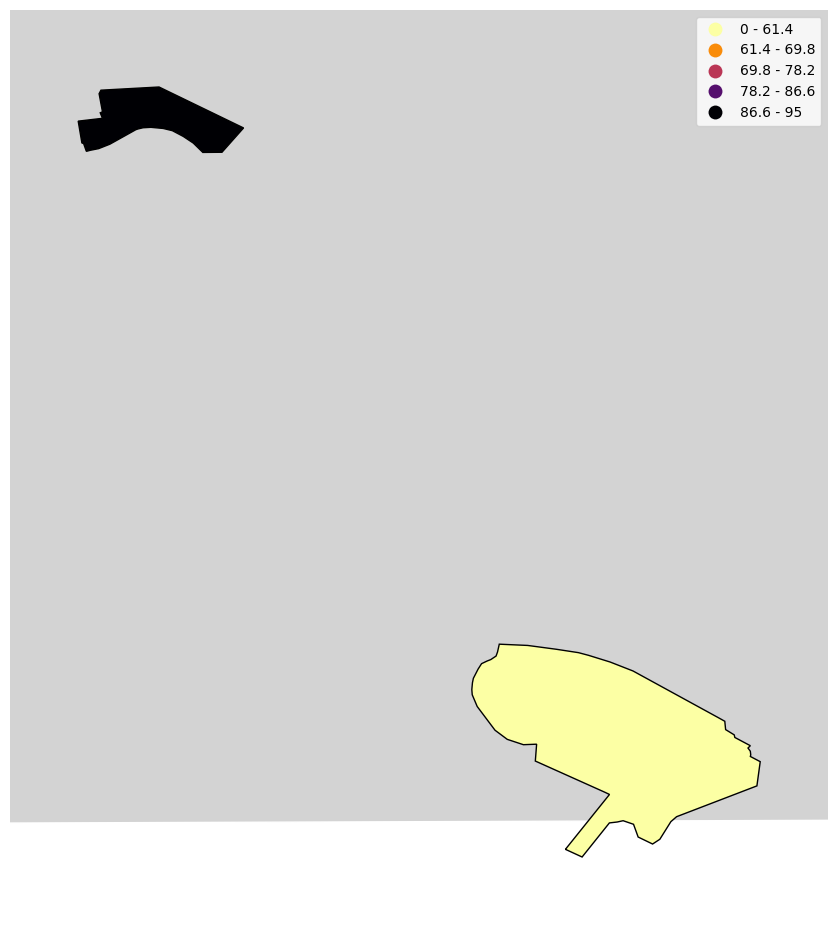

In [76]:
gpd_per_person = gdf_newyork['PercentOfBaseline']
scheme = mapclassify.Quantiles(gpd_per_person, k = 5)

base2 = gplt.polyplot(
    newyork_shape,
    edgecolor = 'white',
    facecolor = 'lightgray',
    figsize = (12, 12)
)
gplt.choropleth(
    gdf_newyork, ax = base2,
    hue = gpd_per_person,
    scheme = scheme,
    cmap = 'inferno_r',
    legend = True,
    figsize = (12, 12)
)


## geoplot의 pointplot으로 plot
geoplot으로 pointplot을 그릴 수 있다.

geometry 열에 대한 point 인스턴스가 있는 geopandas 데이터 프레임을 전달해야 한다.

In [84]:
def create_point_geom(data):
    x = data[0]
    y = data[1]
    point = Point(x, y)
    return point

In [85]:
gdf["geometry"] = gdf[["long", "lat"]].apply(create_point_geom, axis=1)

AttributeError: ignored

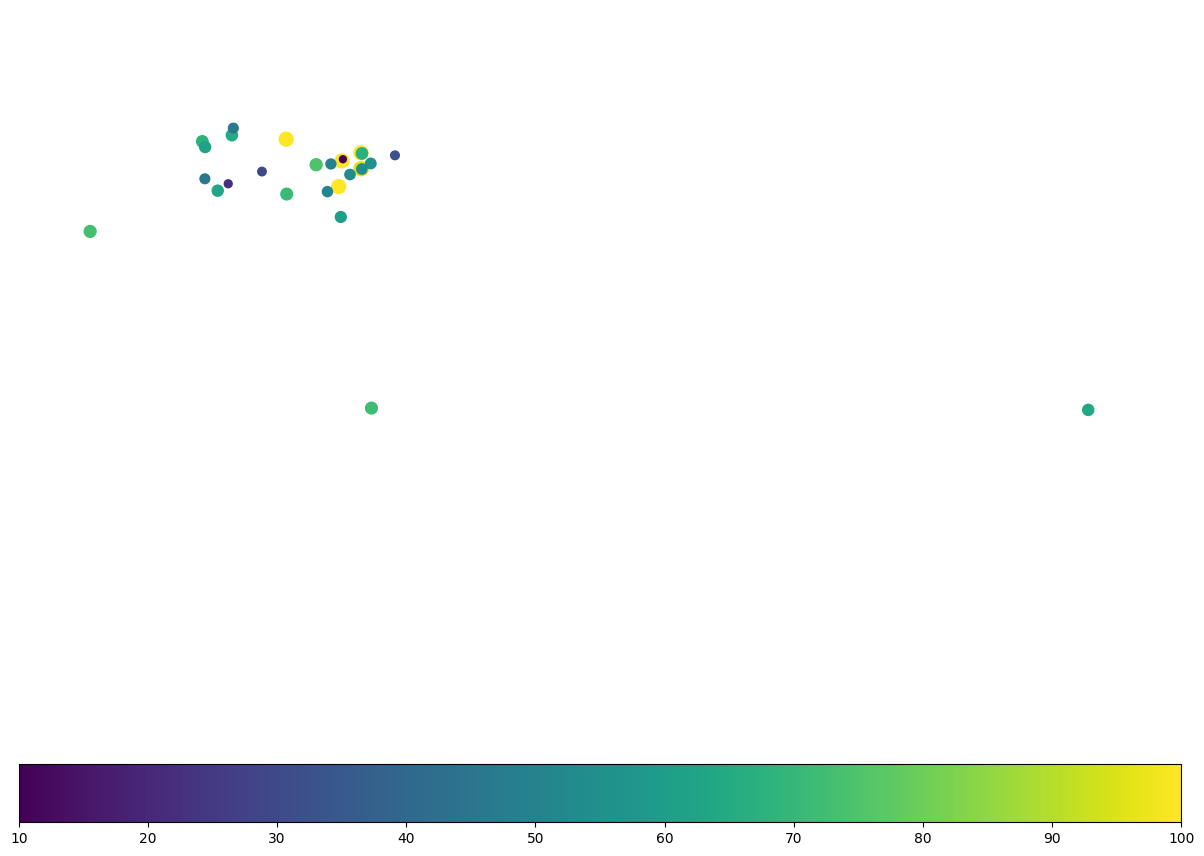

In [96]:
ax = gplt.pointplot(
    gpd.GeoDataFrame(gdf),
    legend_kwargs={'orientation': 'horizontal'}, scale='PercentOfBaseline',limits=(5, 10),
    hue='PercentOfBaseline', legend=True, figsize=(15, 15)
)
gplt.polyplot(
    world, ax=ax,
    edgecolor='None', facecolor='lightgray'
)